In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
results_1 = pickle.load(open("cmj_exp_results_1.pkl", "rb"))
results_2 = pickle.load(open("cmj_exp_results_2.pkl", "rb"))

In [5]:
results_all = [results_1, results_2]

In [6]:
def average_participant_results(results, k_folds=3):
    
    acc = 0
    f_score = 0
    conf_mat = np.zeros((3,3), dtype="int")
    
    for i in range(k_folds):
        acc += results["cv{}_accuracy".format(i)]
        f_score += results["cv{}_f_score".format(i)]
       
        # dealing with different size confusion matrices / shouldn't be larger than 3,3
        cm = np.array(results["cv{}_conf_mat".format(i)], dtype="int")
        idx_y = cm.shape[0] - cm.shape[0]
        idx_x = cm.shape[1] - cm.shape[1]
        cm[:-idx_y or None, :-idx_x or None] += cm
        
    return acc / k_folds, f_score / k_folds, cm


In [7]:
def average_experiment_results(results, participants, k_folds=3):
    
    exp_acc = 0
    exp_f = 0
    exp_cm = np.zeros((3,3), dtype="int")
    
    for p in participants:
        acc, f_score, cm = average_participant_results(results[p], k_folds)
        exp_acc += acc
        exp_f += f_score
        
        diff_x = (exp_cm.shape[1] - cm.shape[1]) * -1
        diff_y = (exp_cm.shape[0] - cm.shape[0]) * -1
        exp_cm[:diff_y or None,:diff_x or None] += cm
        
    return exp_acc / len(participants), exp_f / len(participants), exp_cm

In [28]:
acc, f_score, conf_mat = average_participant_results(results_1["p4"])

In [29]:
print(acc)
print(f_score)
print(conf_mat)

0.867604447212
0.867388477777
[[1248  370]
 [ 184 1918]]


In [11]:
participants = ["p1", "p3", "p4", "p6"]
acc, f_score, conf_mat = average_experiment_results(results_1, participants)

In [12]:
print(acc)
print(f_score)
print(conf_mat)

0.933265995752
0.930524465362
[[11778   398   140]
 [  404  2896     0]
 [  178    24   470]]


In [24]:
acc, f_score, conf_mat = average_experiment_results(results_2, participants)

In [25]:
print(acc)
print(f_score)
print(conf_mat)

0.947489182457
0.945159779681
[[11890   296   130]
 [  318  2982     0]
 [  184    22   466]]


In [13]:
accs, fs, cms = [], [], []
for r in results_all:
    exp_accs, exp_fs, exp_cms = [], [], []
    
    for p in participants:
        acc, f_score, cm = average_participant_results(r[p])
        
        exp_accs.append(acc)
        exp_fs.append(f_score)
        exp_cms.append(cm)
        
    accs.append(exp_accs)
    fs.append(exp_fs)
    cms.append(exp_cms)
    
accs = np.array(accs)
fs = np.array(fs)
cms = np.array(cms)

l = len(accs)

<Container object of 2 artists>

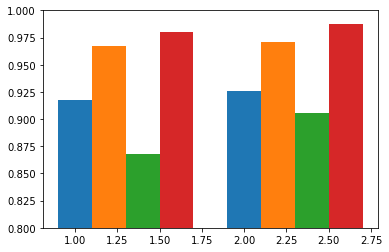

In [14]:
idx = np.arange(l) + 1
width = .2

plt.ylim([.8, 1.0])

plt.bar(idx+width*0, accs[:,0], width)
plt.bar(idx+width*1, accs[:,1], width)
plt.bar(idx+width*2, accs[:,2], width)
plt.bar(idx+width*3, accs[:,3], width)

<Container object of 2 artists>

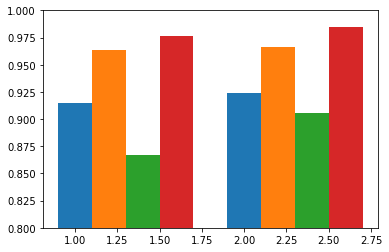

In [15]:
idx = np.arange(l) + 1
width = .2

plt.ylim([.8, 1.0])

plt.bar(idx+width*0, fs[:,0], width)
plt.bar(idx+width*1, fs[:,1], width)
plt.bar(idx+width*2, fs[:,2], width)
plt.bar(idx+width*3, fs[:,3], width)

<Container object of 2 artists>

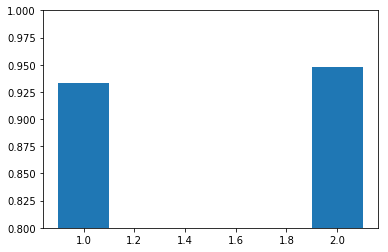

In [16]:
idx = np.arange(l) + 1
width = .2

plt.ylim([.8, 1.0])

plt.bar(idx, np.average(accs, axis=1), width)

<Container object of 2 artists>

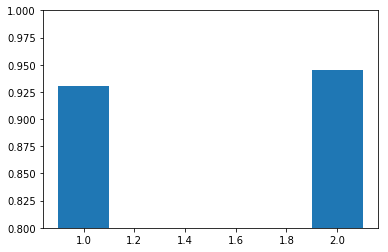

In [17]:
idx = np.arange(l) + 1
width = .2

plt.ylim([.8, 1.0])

plt.bar(idx, np.average(fs, axis=1), width)

[[3922   10  140]
 [  52   48    0]
 [ 144    2  470]]
[[2524   16    0]
 [  88  870    0]
 [   0   22    0]]
[[1248  370]
 [ 184 1918]]
[[4084    2    0]
 [  80   60    0]
 [  34    0    0]]


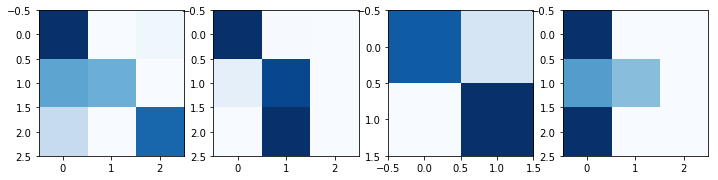

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(141)
for i, cm in enumerate(cms[0]):

    print(cm)
    
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    plt.subplot(1, 4, i+1)
    plt.imshow(cm, cmap="Blues")
    
plt.show()

[[3938    4  130]
 [  50   50    0]
 [ 150    0  466]]
[[2538    2    0]
 [ 104  854    0]
 [   0   22    0]]
[[1330  288]
 [ 106 1996]]
[[4084    2    0]
 [  58   82    0]
 [  34    0    0]]


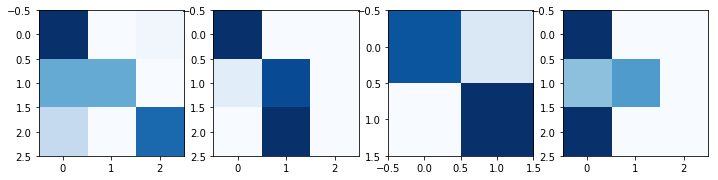

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(141)
for i, cm in enumerate(cms[1]):

    print(cm)
    
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    plt.subplot(1, 4, i+1)
    plt.imshow(cm, cmap="Blues")
    
plt.show()